# Sales Prediction Using Python

## Overview
This Jupyter Notebook demonstrates a simple linear regression model to predict sales based on advertising expenditures across three media channels: TV, Radio, and Newspaper. The dataset used is `advertising.csv`, which contains historical advertising data and corresponding sales figures.

## Libraries Used
- **Pandas**: For data manipulation and analysis.
- **Matplotlib**: For data visualization (imported as `plt`).
- **Seaborn**: For enhanced data visualization.(imported as `sns`)
- **Scikit-learn**: For machine learning functionalities, including model training and evaluation.

## Steps

### 1. Import Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### 2. Load Data
The dataset is loaded into a Pandas DataFrame.

In [4]:
data = pd.read_csv("advertising.csv")


### 3. Exploratory Data Analysis (EDA)
- **View Data**: Display the first and last few rows of the dataset.
- **Summary Statistics**: Generate descriptive statistics to understand the data distribution.

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [49]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [48]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


### 4. Data Visualization
Visualize the relationships between advertising expenditures and sales using pair plots.

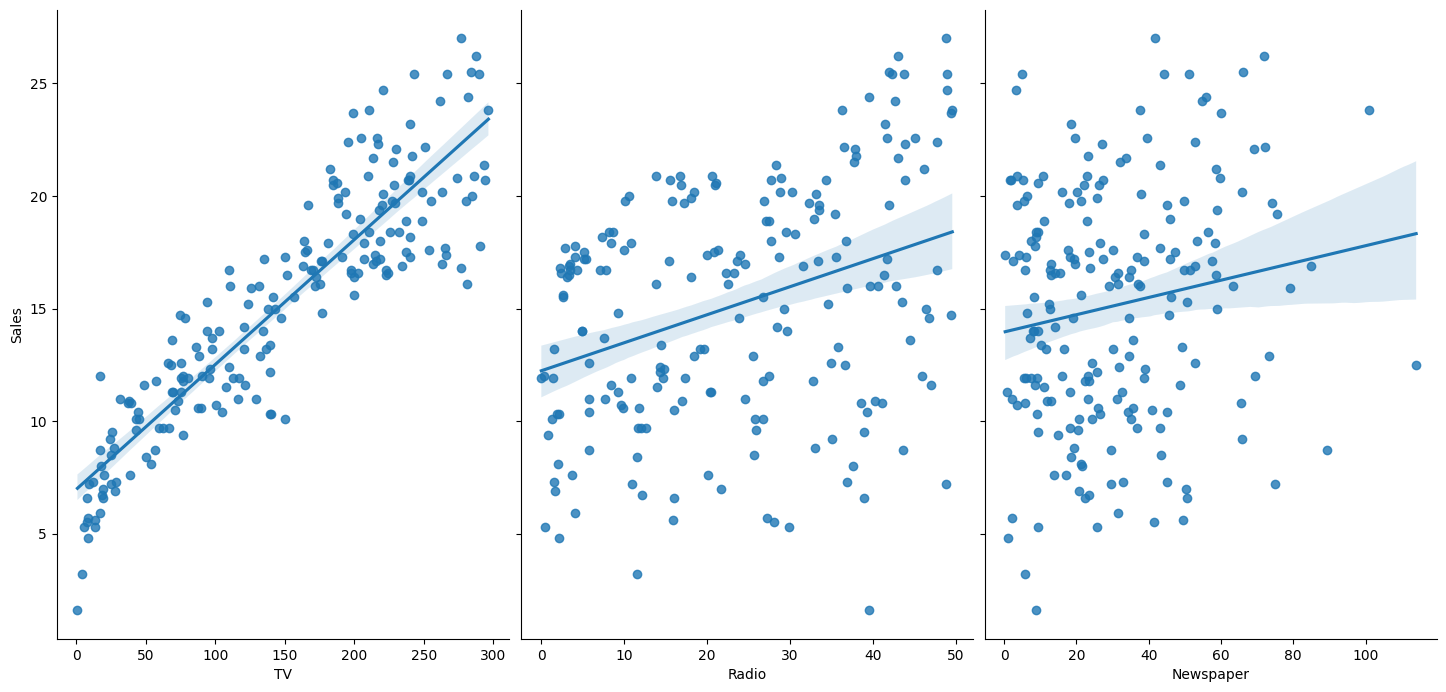

In [21]:
# Visualize the relationships between features and target variable
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

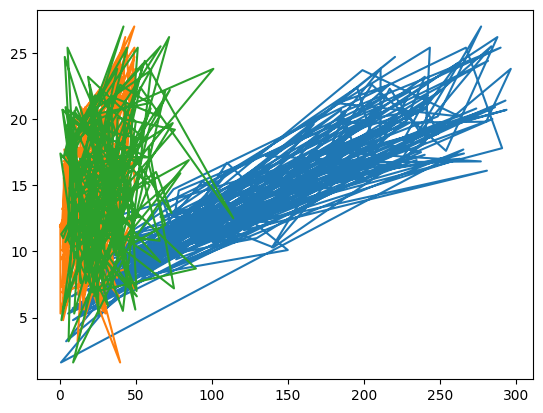

In [44]:
x_plt = data[['TV', 'Radio', 'Newspaper']]
y_plt = data['Sales']

fig,ax = plt.subplots()
ax.plot(x_plt, y_plt)
plt.show()


### 5. Data Preparation
Split the dataset into features (X) and target variable (y), and then into training and testing sets.

In [15]:
# Split the data into training and testing sets
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Model Training
Initialize and train a linear regression model.

In [16]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 7. Predictions and Evaluation
Make predictions on the test set and evaluate the model using Mean Squared Error (MSE) and R-squared (R²) metrics.

In [17]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(np.float64(2.9077569102710896), 0.9059011844150826)


### 8. Coefficients
Display the coefficients of the linear regression model to understand the impact of each feature on sales.

In [18]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
TV,0.054509
Radio,0.100945
Newspaper,0.004337



### 9. Making Predictions
Use the trained model to predict sales for new advertising data.

In [20]:
new_data = pd.DataFrame({
    'TV': [155.0],
    'Radio': [20.0],
    'Newspaper': [25.0]
})
predicted_sales = model.predict(new_data)
print(predicted_sales)

[15.2903868]



## Conclusion
This notebook provides a foundational approach to predicting sales using linear regression. The model can be further improved by exploring more complex algorithms, feature engineering, and hyperparameter tuning.